# Dashboard Project
This is a project that starts as a simple script and ends as a professional-grade trading and data analysis platform.

## Phase 1 (Jan - Mar)
**The Goal**: Just get data.\
**What I will build**: A script that asks for a stock ticker (like "AAPL") and fetches its current price using a free API (like Yahoo Finance or Alpha Vantage).\
**What I will learn**: Variables, user input, if/else logic, and how to use APIs (how programs talk to each other).

In [ ]:
import yfinance as yf
import csv
def get_price(ticker):
    try:
        price = ticker.fast_info['last_price']
        return price
    except (KeyError, Exception) as e:
        return None

# WHen the user exits its saves history list to a CSV file (e.g., stock_log.csv).
def stock_logger_csv(history):
    with open('stock_log.csv', 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Ticker', 'Price'])
        for ticker in history:
            csv_writer.writerow([ticker[0].ticker, ticker[1]])

def main():
    # enter stock ticker
    history = []
    while True:
        user_input = input("Please enter a stock ticker (eg. AAPL, MSFT): ")
        user_input = user_input.upper().strip()
        if user_input == "EXIT" or user_input == "Q":
            print("Thank you for using this stock checker.")
            print("History")
            print("---------")
            for ticker in history:
                print(f"{ticker[0].ticker}: {ticker[1]:.2f}")
            break

        ticker = yf.Ticker(user_input)
        try:
            # Try to access ticker info to validate
            price = get_price(ticker)
            if price is None:
                print(f"Error: Price data unavailable for '{user_input}'")
            else:
                print(f"{ticker.ticker}: ${price:.2f}")
                history.append([ticker, price])
        except (KeyError, Exception) as e:
            print(f"Error: '{user_input}' is not a valid stock ticker or data is unavailable.\nPlease check the ticker symbol and try again.")
    stock_logger_csv(history)

### Graphing watchlist data
Using the data from the CSV file, we can create a function that creates a bar graph of the stock prices. I made use of the Pandas library to read the CSV file and the Matplotlib library to create the graph.


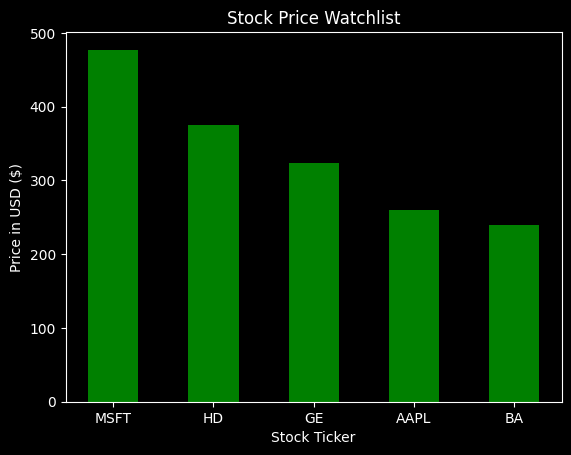

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('stock_log.csv')
top_5 = df.nlargest(5, 'Price')
tickers = top_5['Ticker']
prices = top_5['Price']

plt.bar(tickers, prices, width=0.5, color = 'green')
plt.xlabel('Stock Ticker')
plt.ylabel('Price in USD ($)')
plt.title('Stock Price Watchlist')
# display the graph
plt.show()
